**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [11]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [12]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [13]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [14]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [15]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [16]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [17]:
np.random.seed(2024)

# Initialize storage for expected and realized utilities
expected_utilities = np.zeros(par.J)
realized_utilities = np.zeros(par.J)

# Simulate and calculate the utilities
for j in range(par.J):
    # Simulate the error terms
    eps = np.random.normal(0, par.sigma, par.K)
    
    # Calculate the expected utility
    expected_utility = par.v[j] + np.mean(eps)
    expected_utilities[j] = expected_utility
    
    # Calculate the realized utility for each simulation and then take the average
    realized_utility = par.v[j] + eps
    average_realized_utility = np.mean(realized_utility)
    realized_utilities[j] = average_realized_utility

# Print the results: expected utility and the average realized utility for each career track.
for j in range(par.J):
    print(f'Career Track {j+1}:')
    print(f'  Expected Utility: {expected_utilities[j]}')
    print(f'  Average Realized Utility: {realized_utilities[j]}')

Career Track 1:
  Expected Utility: 1.0153916595866406
  Average Realized Utility: 1.0153916595866406
Career Track 2:
  Expected Utility: 2.006377883330794
  Average Realized Utility: 2.006377883330794
Career Track 3:
  Expected Utility: 3.002969605976466
  Average Realized Utility: 3.0029696059764666


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [21]:
np.random.seed(2024)

# Initialize arrays to store results
share_of_graduates = np.zeros((par.N, par.J))
avg_subjective_expected_utility = np.zeros(par.N)
avg_realized_utility = np.zeros(par.N)

# New scenario with friends' influence
for i in range(1, par.N + 1):
    # Draw F_i = i friends' utilities for each career
    Fi = i
    prior_utilities = np.zeros((par.K, par.J))
    
    for j in range(par.J):
        epsilon_friends = np.random.normal(0, par.sigma, (par.K, Fi))
        prior_utilities[:, j] = par. v[j] + np.mean(epsilon_friends, axis=1)
    
    # Draw own noise terms
    epsilon_own = np.random.normal(0, par.sigma, (par.K, par.J))
    
    # Calculate prior expected utilities and choose the career with the highest utility
    expected_utilities_own = prior_utilities + epsilon_own
    chosen_careers = np.argmax(expected_utilities_own, axis=1)
    
    # Calculate shares of graduates choosing each career
    for j in range(par.J):
        share_of_graduates[i-1, j] = np.mean(chosen_careers == j)
    
    # Calculate the average subjective expected utility
    avg_subjective_expected_utility[i-1] = np.mean(expected_utilities_own[np.arange(par.K), chosen_careers])
    
    # Calculate the average realized utility
    realized_utilities = par.v[chosen_careers] + epsilon_own[np.arange(par.K), chosen_careers]
    avg_realized_utility[i-1] = np.mean(realized_utilities)

Share of graduates choosing each career for each type of graduate:
[[0.196  0.3235 0.4805]
 [0.1752 0.3112 0.5136]
 [0.1669 0.3114 0.5217]
 [0.1697 0.307  0.5233]
 [0.1622 0.3081 0.5297]
 [0.1586 0.304  0.5374]
 [0.1657 0.299  0.5353]
 [0.162  0.2996 0.5384]
 [0.1616 0.2968 0.5416]
 [0.1616 0.3065 0.5319]]


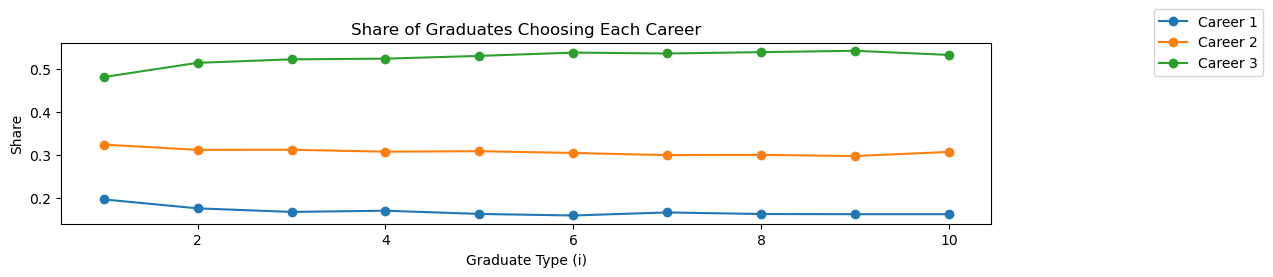

In [24]:
# Plot results
plt.figure(figsize=(12, 8))

# Plot share of graduates choosing each career
plt.subplot(3, 1, 1)
for j in range(par.J):
    plt.plot(range(1, par.N + 1), share_of_graduates[:, j], label=f'Career {j+1}', marker='o')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
# Adding a legend
plt.legend(frameon=True, loc='right', bbox_to_anchor=(1.3,1.0));
# Print out the results for clarity
print("Share of graduates choosing each career for each type of graduate:")
print(share_of_graduates)


Average subjective expected utility for each type of graduate:
[4.56336777 4.26488992 4.1492162  4.06849667 4.04078508 3.99833694
 3.9923021  3.98452306 3.98891623 3.98847247]


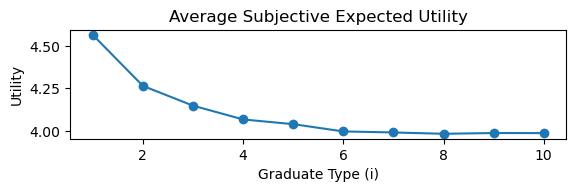

In [25]:
# Plot average subjective expected utility
plt.subplot(3, 1, 2)
plt.plot(range(1, par.N + 1), avg_subjective_expected_utility, marker='o')
plt.title('Average Subjective Expected Utility')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')
# Print out the results for clarity
print("\nAverage subjective expected utility for each type of graduate:")
print(avg_subjective_expected_utility)

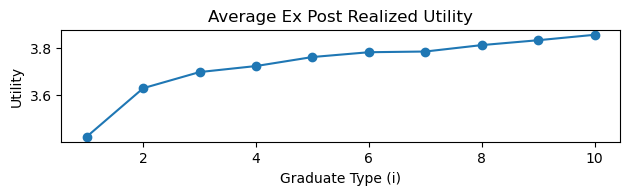


Average ex post realized utility for each type of graduate:
[3.4255741  3.6291485  3.69691302 3.72225365 3.76010758 3.78027092
 3.7832216  3.8102099  3.83073694 3.85351672]


In [26]:
# Plot average ex post realized utility
plt.subplot(3, 1, 3)
plt.plot(range(1, par.N + 1), avg_realized_utility, marker='o')
plt.title('Average Ex Post Realized Utility')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')
plt.tight_layout()
plt.show()
# Print out the results for clarity
print("\nAverage ex post realized utility for each type of graduate:")
print(avg_realized_utility)  

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [27]:
par.c = 1  # Switching cost

# Initialize arrays to store results
initial_career_choice = np.zeros(par.N)
expected_utility = np.zeros((par.N, par.J))
realized_utility = np.zeros(par.N)

for i in range(par.N):
    Fi = i + 1  # Number of friends each graduate has
    noise_terms = np.random.normal(0, par.sigma, (par.K, par.J))
    expected_utility[i, :] = par.v + np.mean(noise_terms[:Fi, :], axis=0)
    initial_career_choice[i] = np.argmax(expected_utility[i, :])
    realized_utility[i] = par.v[int(initial_career_choice[i])] + np.random.normal(0, par.sigma)

# Initialize arrays for new career choice
new_career_choice = np.zeros(par.N)
new_expected_utility = np.zeros((par.N, par.J))
new_realized_utility = np.zeros(par.N)
switch_cost = par.c

for i in range(par.N):
    initial_choice = int(initial_career_choice[i])
    for j in range(par.J):
        if j != initial_choice:
            new_expected_utility[i, j] = par.v[j] - switch_cost
        else:
            new_expected_utility[i, j] = realized_utility[i]
    
    new_career_choice[i] = np.argmax(new_expected_utility[i, :])
    new_realized_utility[i] = par.v[int(new_career_choice[i])] + np.random.normal(0, par.sigma)

# Average subjective expected utility
average_expected_utility = np.mean(new_expected_utility, axis=1)

# Share of graduates switching careers
switching_graduates = initial_career_choice != new_career_choice
share_switching = np.sum(switching_graduates) / par.N

# Conditional share of switching
conditional_share_switching = np.zeros(par.J)
for j in range(par.J):
    graduates_initially_in_j = initial_career_choice == j
    if np.sum(graduates_initially_in_j) > 0:
        conditional_share_switching[j] = np.sum(switching_graduates[graduates_initially_in_j]) / np.sum(graduates_initially_in_j)

New Optimal Career Choice for Each Graduate i:
[1. 2. 2. 2. 2. 2. 2. 1. 2. 1.]
Average Subjective Expected Utility from New Optimal Career Choice:
[ 1.98497455  0.85845489  1.90717177  1.11950115  1.57561175  1.87619849
  1.78048338  0.49911322  1.19480451 -0.38353137]
Ex Post Realized Utility of That Career:
[ 2.43917518  3.67668057  2.87507849  1.70451351  2.84802673 -0.52009707
  2.05653237  1.36841593 -2.94171606  2.93041196]
Share of Graduates That Choose to Switch Careers:
0.3


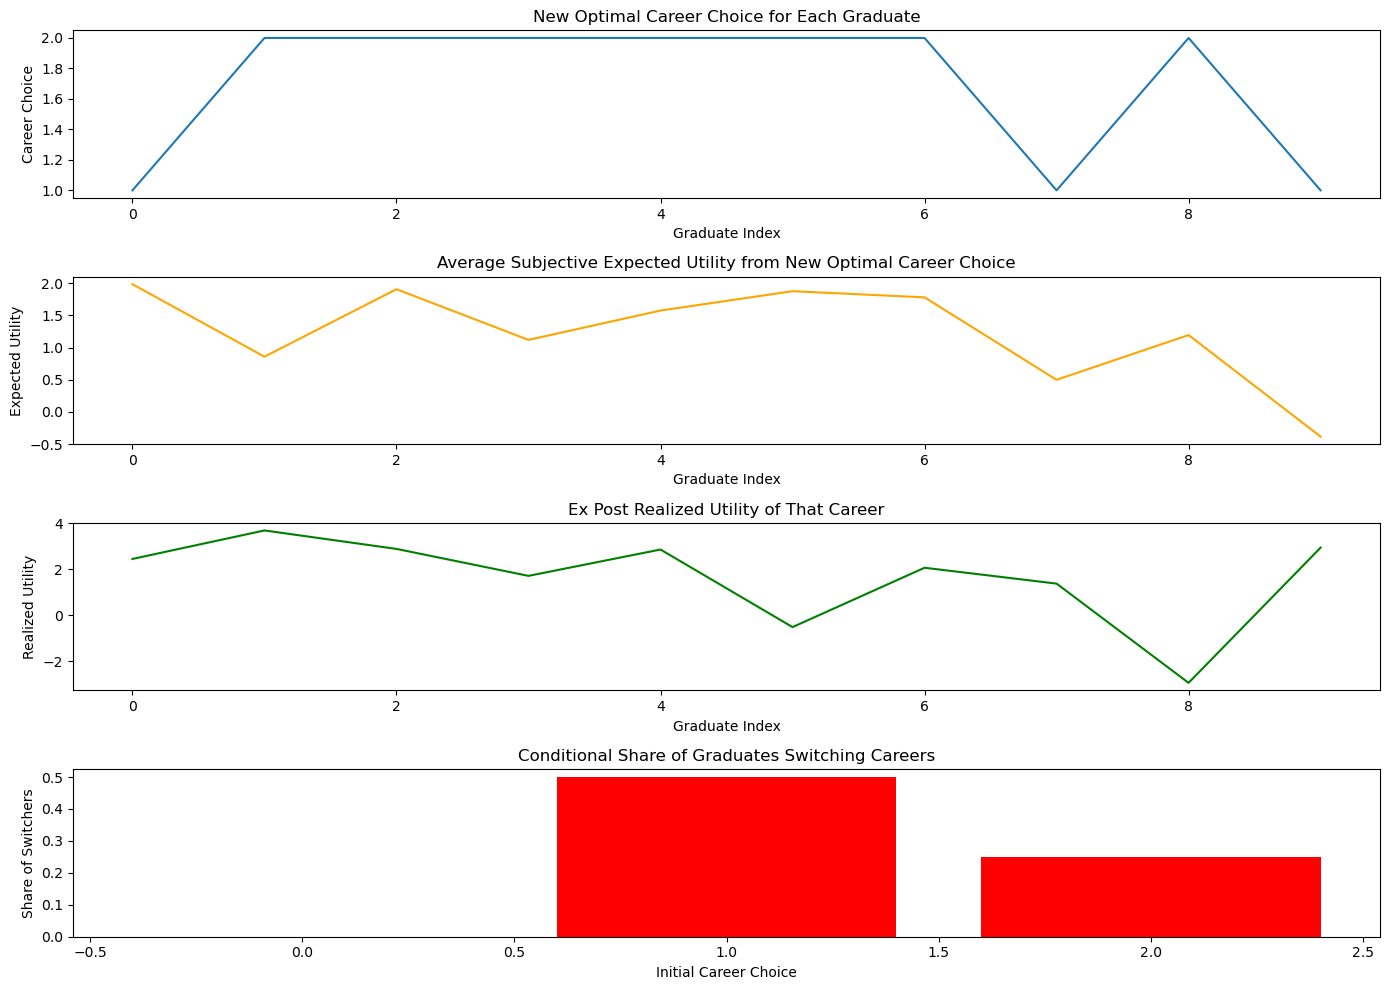

Conditional Share of Graduates Switching Careers:
[0.   0.5  0.25]


In [31]:
plt.figure(figsize=(14, 10))

# Plot 1. New Optimal Career Choice for Each Graduate
plt.subplot(4, 1, 1)
plt.plot(range(par.N), new_career_choice)
plt.title('New Optimal Career Choice for Each Graduate')
plt.xlabel('Graduate Index')
plt.ylabel('Career Choice')

print("New Optimal Career Choice for Each Graduate i:")
print(new_career_choice)

# Plot 2. Average Subjective Expected Utility from New Optimal Career Choice
plt.subplot(4, 1, 2)
plt.plot(range(par.N), average_expected_utility, color='orange')
plt.title('Average Subjective Expected Utility from New Optimal Career Choice')
plt.xlabel('Graduate Index')
plt.ylabel('Expected Utility')
print("Average Subjective Expected Utility from New Optimal Career Choice:")
print(average_expected_utility)

# Plot 3. Ex Post Realized Utility of That Career
plt.subplot(4, 1, 3)
plt.plot(range(par.N), new_realized_utility, color='green')
plt.title('Ex Post Realized Utility of That Career')
plt.xlabel('Graduate Index')
plt.ylabel('Realized Utility')

print("Ex Post Realized Utility of That Career:")
print(new_realized_utility)

# Plot 4. Share of Graduates That Choose to Switch Careers
plt.subplot(4, 1, 4)
plt.bar(range(par.J), conditional_share_switching, color='red')
plt.title('Conditional Share of Graduates Switching Careers')
plt.xlabel('Initial Career Choice')
plt.ylabel('Share of Switchers')
print("Share of Graduates That Choose to Switch Careers:")
print(share_switching)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

print("Conditional Share of Graduates Switching Careers:")
print(conditional_share_switching)

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here